In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils import to_categorical

In [25]:
name = "FPT"
data = pd.read_csv('All_{name}.csv'.format(name=name)).filter(['Date/Time','Close'])
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data['Date/Time'] = (data['Date/Time'] - data['Date/Time'].min()) / np.timedelta64(1,'D')
# Normalize the stock data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Convert the normalized data into a time series format
timesteps = 60
X = []
y = []
for i in range(timesteps, data_scaled.shape[0]):
    X.append(data_scaled[i-timesteps:i, 0])
    if data_scaled[i, 0] > data_scaled[i-1, 0]:
        y.append(1)
    else:
        y.append(0)
X, y = np.array(X), np.array(y)


In [26]:
# Reshape the input into 3D format to use LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# One-hot encode the target data
y = to_categorical(y)

In [34]:
# Split the data into training and testing sets
train_size = int(0.8 * X.shape[0])
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]
print(X_train, y_train)
print(len(X_train))


[[[0.        ]
  [0.00137319]
  [0.0014018 ]
  ...
  [0.01790874]
  [0.01793735]
  [0.01796596]]

 [[0.00137319]
  [0.0014018 ]
  [0.00143041]
  ...
  [0.01793735]
  [0.01796596]
  [0.01808039]]

 [[0.0014018 ]
  [0.00143041]
  [0.00145902]
  ...
  [0.01796596]
  [0.01808039]
  [0.018109  ]]

 ...

 [[0.79673866]
  [0.79676727]
  [0.79782578]
  ...
  [0.80883994]
  [0.80886855]
  [0.80889715]]

 [[0.79676727]
  [0.79782578]
  [0.79785438]
  ...
  [0.80886855]
  [0.80889715]
  [0.80892576]]

 [[0.79782578]
  [0.79785438]
  [0.79788299]
  ...
  [0.80889715]
  [0.80892576]
  [0.80904019]]] [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
3541


In [28]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# Train the LSTM model on the training data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
111/111 [==============================] - 17s 93ms/step - loss: 0.0596 - accuracy: 0.9910 - val_loss: 5.6602e-05 - val_accuracy: 1.0000
Epoch 2/100
111/111 [==============================] - 6s 55ms/step - loss: 4.5567e-05 - accuracy: 1.0000 - val_loss: 3.5641e-05 - val_accuracy: 1.0000
Epoch 3/100
111/111 [==============================] - 4s 37ms/step - loss: 3.0645e-05 - accuracy: 1.0000 - val_loss: 2.5653e-05 - val_accuracy: 1.0000
Epoch 4/100
111/111 [==============================] - 4s 38ms/step - loss: 2.2889e-05 - accuracy: 1.0000 - val_loss: 1.9908e-05 - val_accuracy: 1.0000
Epoch 5/100
111/111 [==============================] - 5s 41ms/step - loss: 1.8102e-05 - accuracy: 1.0000 - val_loss: 1.6093e-05 - val_accuracy: 1.0000
Epoch 6/100
111/111 [==============================] - 4s 39ms/step - loss: 1.4798e-05 - accuracy: 1.0000 - val_loss: 1.3351e-05 - val_accuracy: 1.0000
Epoch 7/100
111/111 [==============================] - 5s 42ms/step - loss: 1.2438e-05 - ac

In [ ]:
# Train the LSTM model on the training data


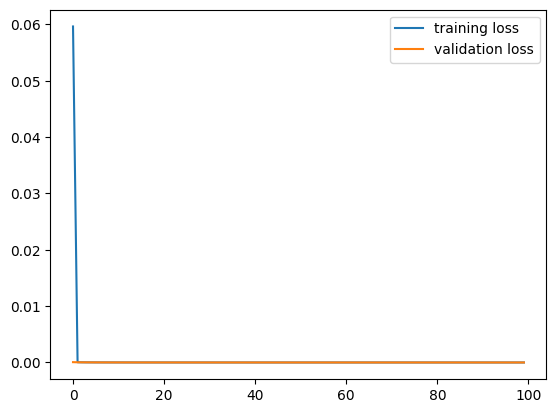

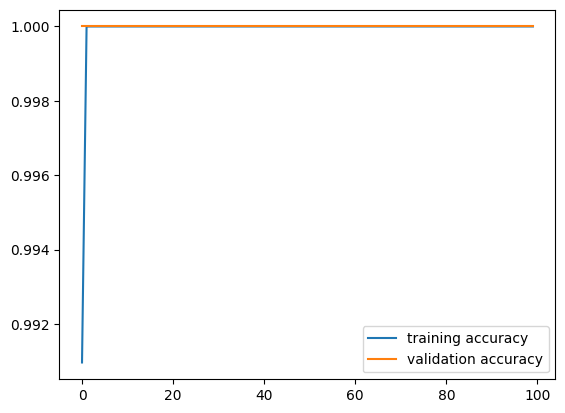

28/28 [==============================] - 3s 24ms/step
Accuracy: 1.0


In [32]:
# Plot the training loss and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
# Plot the true values and validation loss
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)